In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# Read Datasets 
bitcoin_data = pd.read_csv('Datasets/Kraken_BTCUSD_d.csv')
google_trends_data = pd.read_csv('Datasets/block_trends_complete.csv')

In [3]:
# Get datasets info
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 8 columns):
Date          2032 non-null object
Symbol        2032 non-null object
Open          2032 non-null float64
High          2032 non-null float64
Low           2032 non-null float64
Close         2032 non-null float64
Volume BTC    2032 non-null float64
Volume USD    2032 non-null float64
dtypes: float64(6), object(2)
memory usage: 127.1+ KB


In [4]:
google_trends_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 2 columns):
date       1590 non-null object
bitcoin    1590 non-null float64
dtypes: float64(1), object(1)
memory usage: 24.9+ KB


In [5]:
# Get total number of rows missing a value
bitcoin_data.isna().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [6]:
google_trends_data.isna().sum()

date       0
bitcoin    0
dtype: int64

In [22]:
len(bitcoin_data)

2032

In [7]:
bitcoin_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,5/11/19,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75
1,5/10/19,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28
2,5/9/19,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39
3,5/8/19,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52
4,5/7/19,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65


In [11]:
bitcoin_data.tail()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
2027,10/10/13,BTCUSD,123.84,125.86,123.84,125.86,2.00,251.71
2028,10/9/13,BTCUSD,124.18,124.18,123.84,123.84,2.82,349.95
2029,10/8/13,BTCUSD,123.61,124.19,123.61,124.18,3.99,495.14
2030,10/7/13,BTCUSD,122.00,123.61,122.00,123.61,0.10,12.36
2031,10/6/13,BTCUSD,238.00,238.00,122.00,122.00,0.10,12.20


In [23]:
len(google_trends_data)

1590

In [12]:
google_trends_data.head()

,date,bitcoin
0,2015-01-06,62.333333
1,2015-01-07,62.250000
2,2015-01-08,50.916667
3,2015-01-09,52.166667
4,2015-01-10,48.541667


In [13]:
google_trends_data.tail()

,date,bitcoin
1585,2019-05-10,36.958333
1586,2019-05-11,48.125000
1587,2019-05-12,51.416667
1588,2019-05-13,56.958333
1589,2019-05-14,67.000000


In [14]:
# Convert columns to datetime
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65


In [15]:
google_trends_data['date'] = pd.to_datetime(google_trends_data['date'])
google_trends_data.head()

,date,bitcoin
0,2015-01-06,62.333333
1,2015-01-07,62.250000
2,2015-01-08,50.916667
3,2015-01-09,52.166667
4,2015-01-10,48.541667


In [17]:
# Rename columns on Google Trends data to match Bitcoin data
google_trends_data.columns = ['Date', 'Popularity']
google_trends_data.head()

,Date,Popularity
0,2015-01-06,62.333333
1,2015-01-07,62.250000
2,2015-01-08,50.916667
3,2015-01-09,52.166667
4,2015-01-10,48.541667


In [18]:
# Combine both datasets
full_data = pd.merge(bitcoin_data, google_trends_data, on=['Date'])
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1575 entries, 0 to 1574
Data columns (total 9 columns):
Date          1575 non-null datetime64[ns]
Symbol        1575 non-null object
Open          1575 non-null float64
High          1575 non-null float64
Low           1575 non-null float64
Close         1575 non-null float64
Volume BTC    1575 non-null float64
Volume USD    1575 non-null float64
Popularity    1575 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 123.0+ KB


In [19]:
full_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,48.125000
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,36.958333
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,34.708333
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,31.166667
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,32.840000


In [21]:
len(full_data)

1575

In [37]:
# Normalize -> 10^3
full_data['Popularity_Normalized'] = full_data['Popularity']*100
full_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,48.125000,4812.500000
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,36.958333,3695.833333
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,34.708333,3470.833333
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,31.166667,3116.666667
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,32.840000,3284.000000


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


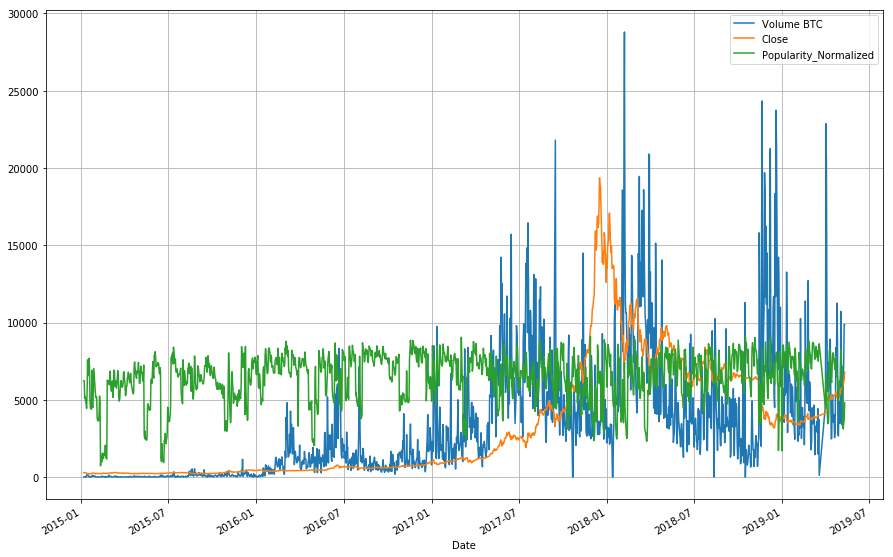

In [38]:
# Plott data
full_data.plot(y=['Volume BTC', 'Close', 'Popularity_Normalized'], x='Date', figsize=(15,10), grid=True)

In [39]:
# Get average closing price, opening price and popularity by year
average_oc_by_year = full_data.copy()
average_oc_by_year['Year'] = pd.DatetimeIndex(average_oc_by_year['Date']).year
average_oc_by_year = average_oc_by_year.groupby(['Year'])[['Open', 'Close', 'Popularity_Normalized']].mean()
average_oc_by_year = average_oc_by_year.reset_index()
average_oc_by_year

,Year,Open,Close,Popularity_Normalized
0,2015,271.473389,271.894833,5696.005556
1,2016,566.796448,568.263388,6868.109290
2,2017,3936.414000,3972.003014,6488.612785
3,2018,7550.822466,7519.481644,6596.283562
4,2019,4246.323529,4272.747899,6981.806723


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


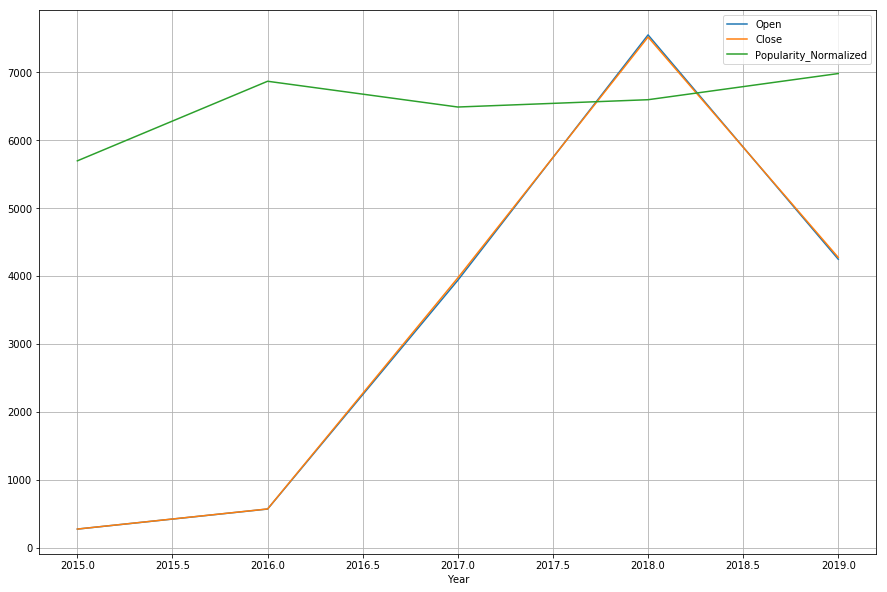

In [41]:
# Plott data
average_oc_by_year.plot(y=['Open', 'Close', 'Popularity_Normalized'], x='Year', figsize=(15,10), grid=True)

In [46]:
# Get average closing price, opening price and popularity by month
average_oc_by_month = full_data.copy()
average_oc_by_month['Month'] = pd.DatetimeIndex(average_oc_by_month['Date']).month
average_oc_by_month = average_oc_by_month.groupby(['Month'])[['Open', 'Close', 'Popularity_Normalized']].mean()
average_oc_by_month = average_oc_by_month.reset_index()
average_oc_by_month

,Month,Open,Close,Popularity_Normalized
0,1,3779.504133,3744.967133,6627.925556
1,2,2924.438936,2930.809007,6087.385343
2,3,2875.775524,2852.408462,6563.642191
3,4,2986.412533,3011.757667,6570.198889
4,5,2996.033333,3002.992370,6224.190123
5,6,2570.063083,2563.622667,6066.398611
6,7,2629.698306,2643.843952,6553.248656
7,8,2839.214516,2845.774677,6753.936828
8,9,2890.714333,2884.364583,7123.216667
9,10,3151.565323,3166.774113,6380.326613


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


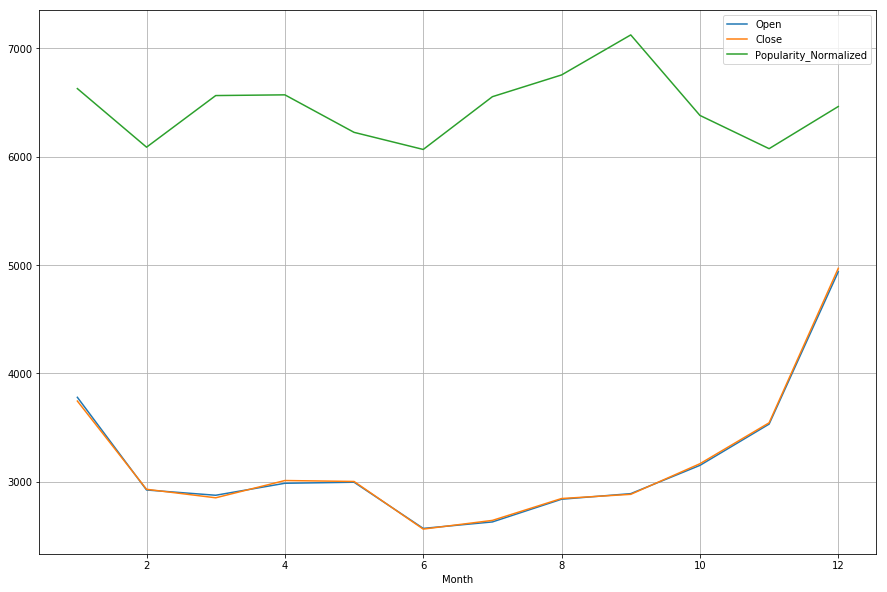

In [47]:
# Plott data
average_oc_by_month.plot(y=['Open', 'Close', 'Popularity_Normalized'], x='Month', figsize=(15,10), grid=True)

In [ ]:
# Save com
avg_block_trends.to_csv('block_trends_complete.csv', encoding='utf-8')